#### NAME: RICHARD WAMBEDE ,   ACCESS NUMBER: B31328  ###

## Theme 2:  Question . 1 Using the dataset (Theme2_News_Final.csv)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import nltk
import re

import nltk.corpus# sample text for performing tokenization
from nltk.tokenize import word_tokenize #for tokenizing

## Theme 2:  Question . 2 Data Preprocessing

In [2]:
# Load Emotions Data 
df = pd.read_csv("Theme2_News_Final.csv")
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [3]:
# Shape Of Data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (93239, 11)


In [4]:
#Check for missing data
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

## Theme 2: Question . 3 (a.) Explorering text frequency distribution

In [5]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [6]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the dataset
df = pd.read_csv('Theme2_News_Final.csv')

# Display column names to identify the text column
print("Columns in the dataset:", df.columns)

# Automatically select the first text-based column
text_column = next((col for col in df.columns if df[col].dtype == 'object'), None)

if text_column is None:
    raise ValueError("No text column found in the dataset.")

print(f"Using '{text_column}' as the text column.")

# Extract text data
text_data = ' '.join(df[text_column].dropna().astype(str))

# Clean the text (remove punctuation, convert to lowercase)
cleaned_text = re.sub(r'[^\w\s]', '', text_data.lower())

# Tokenize and remove stopwords
words = cleaned_text.split()
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Display the most common words
print("Most common words:")
print(word_counts.most_common(20))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\richard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\richard\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\richard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\richard\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Columns in the dataset: Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')
Using 'Title' as the text column.
Most common words:
[('economy', 26240), ('obama', 22583), ('microsoft', 17598), ('obamas', 5204), ('us', 4714), ('palestine', 3835), ('new', 3742), ('says', 3522), ('president', 3040), ('economic', 2952), ('microsofts', 2944), ('windows', 2740), ('2016', 2430), ('global', 2200), ('10', 2157), ('growth', 1938), ('trump', 1721), ('palestinian', 1601), ('china', 1545), ('could', 1361)]


## Theme 2: Question . 3 (b.) Explorering  sentiment- Label distribution

Columns in the dataset: Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')
Using 'SentimentTitle' as the sentiment column.
Sentiment Label Distribution:
SentimentTitle
 0.000000    18712
 0.041667     1130
 0.044194     1036
 0.039528      848
-0.041667      794
             ...  
-0.070800        1
-0.162840        1
 0.063205        1
 0.285417        1
 0.005262        1
Name: count, Length: 14188, dtype: int64


C:\Users\richard\AppData\Local\Temp\ipykernel_7968\1572314346.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


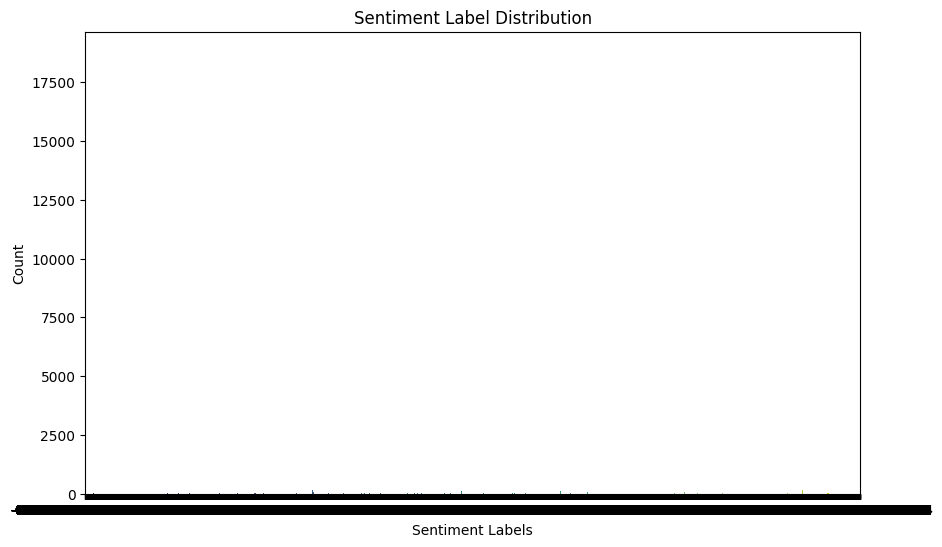

In [7]:
# Load the dataset
df = pd.read_csv('Theme2_News_Final.csv')

# Display column names to identify the sentiment label column
print("Columns in the dataset:", df.columns)

# Automatically select the column with 'sentiment' in its name
sentiment_column = next((col for col in df.columns if 'sentiment' in col.lower()), None)

if sentiment_column is None:
    raise ValueError("No sentiment column found in the dataset.")

print(f"Using '{sentiment_column}' as the sentiment column.")

# Count the sentiment label distribution
sentiment_counts = df[sentiment_column].value_counts()

# Display the counts
print("Sentiment Label Distribution:")
print(sentiment_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

 ## Theme 2: Question . 3 (c.) Generate suitable visuals that highlight key insights

In [8]:
from wordcloud import WordCloud


Columns in the dataset: Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')
Using 'SentimentTitle' as the sentiment column.
Using 'Title' as the text column.


C:\Users\richard\AppData\Local\Temp\ipykernel_7968\4061025040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


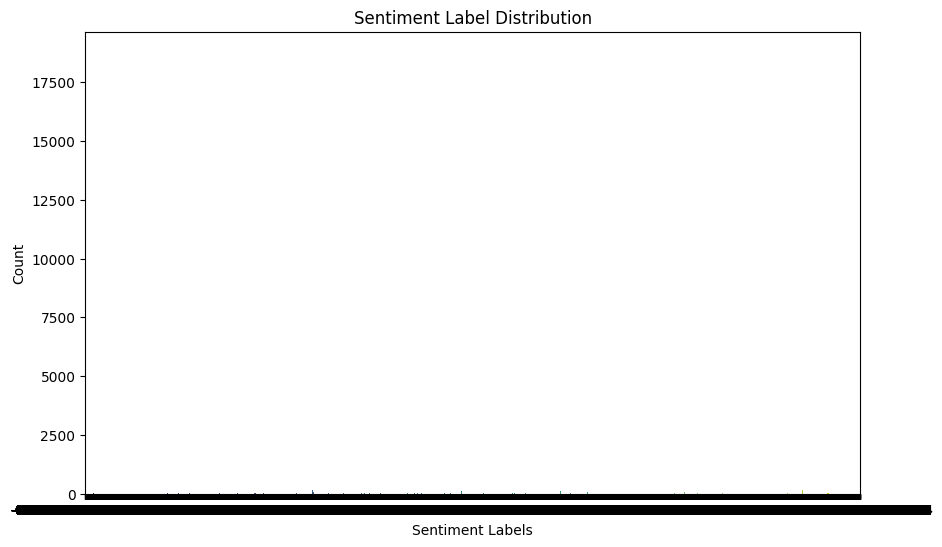

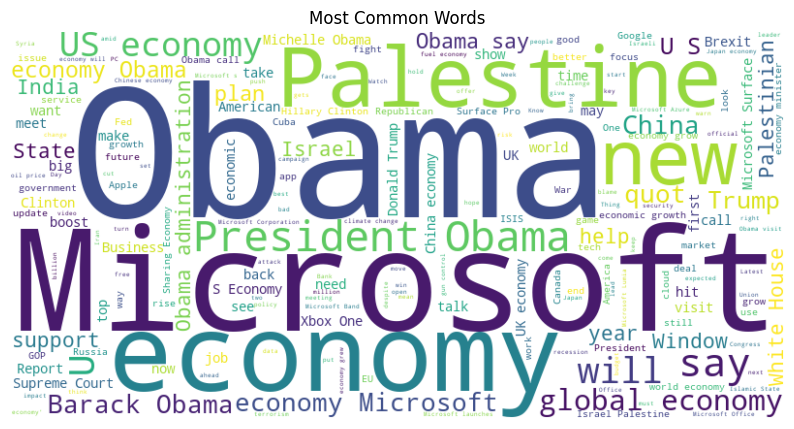

C:\Users\richard\AppData\Local\Temp\ipykernel_7968\4061025040.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[sentiment_column], y=df['text_length'], palette='coolwarm')


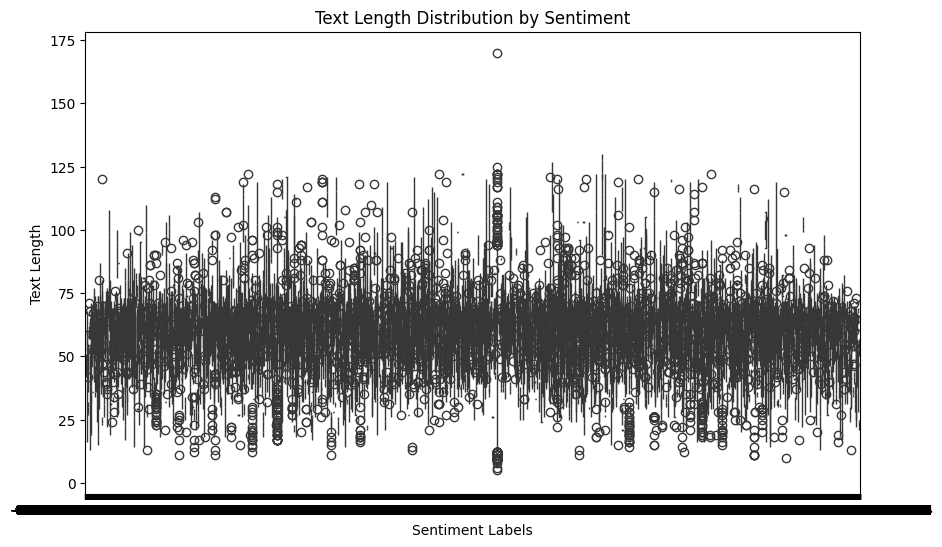

In [9]:
# Load the dataset
df = pd.read_csv('Theme2_News_Final.csv')

# Display column names to identify relevant columns
print("Columns in the dataset:", df.columns)

# Identify sentiment and text columns
sentiment_column = next((col for col in df.columns if 'sentiment' in col.lower()), None)
text_column = next((col for col in df.columns if df[col].dtype == 'object'), None)

if sentiment_column is None:
    raise ValueError("No sentiment column found in the dataset.")
if text_column is None:
    raise ValueError("No text column found in the dataset.")

print(f"Using '{sentiment_column}' as the sentiment column.")
print(f"Using '{text_column}' as the text column.")

# Sentiment Label Distribution
sentiment_counts = df[sentiment_column].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

# Word Cloud for most common words
text_data = ' '.join(df[text_column].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words')
plt.axis('off')
plt.show()

# Sentiment-wise distribution of text lengths
df['text_length'] = df[text_column].dropna().apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[sentiment_column], y=df['text_length'], palette='coolwarm')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment Labels')
plt.ylabel('Text Length')
plt.show()

## Theme 2: Question . 4.  Build , evaluate and optimise a predictive model. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from scipy.sparse import csr_matrix


Columns in the dataset: Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')
Using 'SentimentTitle' as the sentiment column.
Using 'Title' as the text column.
Model Evaluation:
Accuracy: 0.22
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

          25       0.00      0.00      0.00         1
         107       0.00      0.00      0.00         1
         116       0.00      0.00      0.00         1
         157       0.00      0.00      0.00         1
         177       0.00      0.00      0.00         1
         194       0.00      0.00      0.00         1
         254       0.00      0.00      0.00         1
         263       0.00      0.00      0.00         1
         330       0.00  

c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

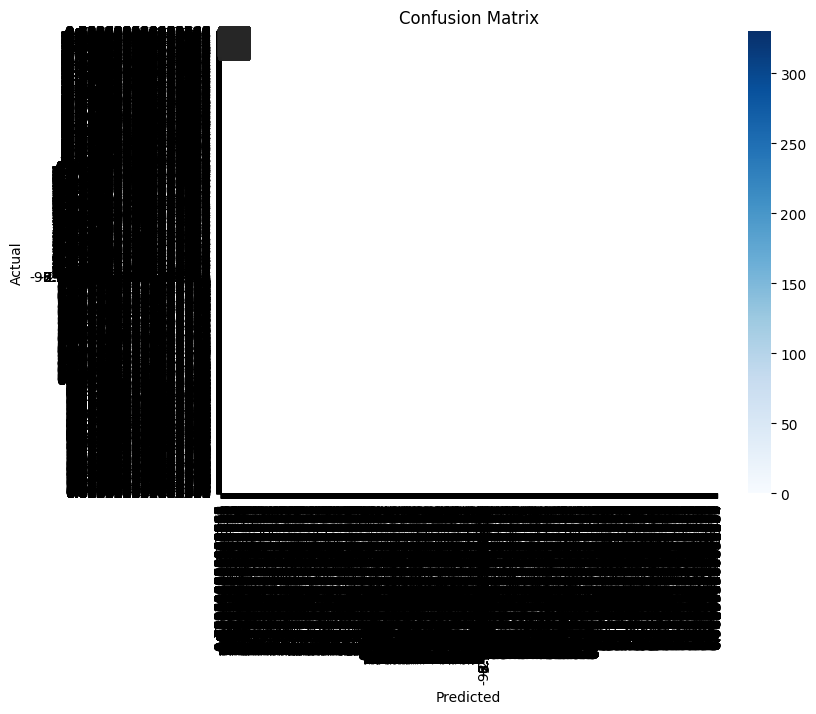

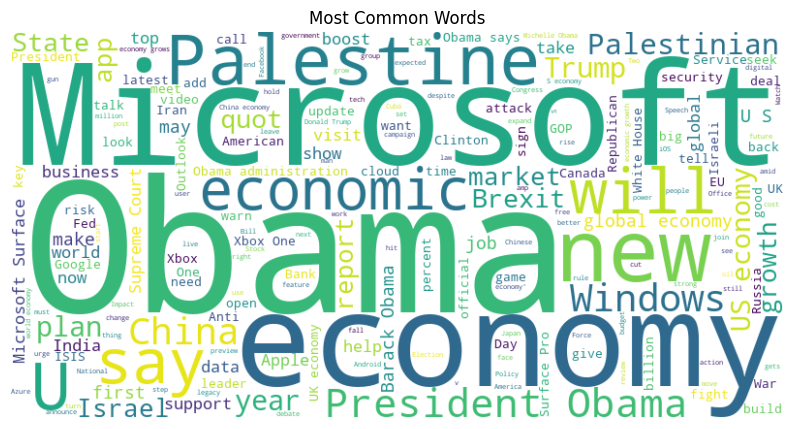

In [17]:
# Load the dataset
df = pd.read_csv('Theme2_News_Final.csv')

# Display column names to identify relevant columns
print("Columns in the dataset:", df.columns)

# Identify sentiment and text columns
sentiment_column = next((col for col in df.columns if 'sentiment' in col.lower()), None)
text_column = next((col for col in df.columns if df[col].dtype == 'object'), None)

if sentiment_column is None:
    raise ValueError("No sentiment column found in the dataset.")
if text_column is None:
    raise ValueError("No text column found in the dataset.")

print(f"Using '{sentiment_column}' as the sentiment column.")
print(f"Using '{text_column}' as the text column.")

# Preprocess data
df = df[[text_column, sentiment_column]].dropna()

# Encode sentiment labels
label_encoder = LabelEncoder()
df[sentiment_column] = label_encoder.fit_transform(df[sentiment_column])

# Reduce data size for memory efficiency
df_sampled = df.sample(n=min(5000, len(df)), random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_sampled[text_column], df_sampled[sentiment_column], test_size=0.3, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Ensure sparse matrix format to save memory
X_train_tfidf = csr_matrix(X_train_tfidf)
X_test_tfidf = csr_matrix(X_test_tfidf)

# Build logistic regression model
model = LogisticRegression(max_iter=500, solver='saga')
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Word Cloud for most common words
text_data = ' '.join(df_sampled[text_column].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words')
plt.axis('off')
plt.show()

## Theme 2: Question . 4.(a)  Generate a Supervised machine learning model that can predict the text sentiment. 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [19]:
# Load dataset
df = pd.read_csv('Theme2_News_Final.csv')

# Combine Title and Headline for text input
df['Text'] = df['Title'].fillna('') + ' ' + df['Headline'].fillna('')

# Convert sentiment scores into categorical labels: Negative, Neutral, Positive
def categorize_sentiment(score):
    if score < -0.1:
        return 'Negative'
    elif score > 0.1:
        return 'Positive'
    else:
        return 'Neutral'

df['SentimentLabel'] = df['SentimentTitle'].apply(categorize_sentiment)

# Feature (text) and label (sentiment)
X = df['Text']
y = df['SentimentLabel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Test with new text
def predict_sentiment(text):
    text_tfidf = vectorizer.transform([text])
    return model.predict(text_tfidf)[0]

# Example
print("Predicted Sentiment:", predict_sentiment("Stocks hit record high as economy recovers"))

Accuracy: 0.7049013299013299
Confusion Matrix:
 [[ 1132  2584    40]
 [  365 11090   234]
 [   37  2243   923]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.30      0.43      3756
     Neutral       0.70      0.95      0.80     11689
    Positive       0.77      0.29      0.42      3203

    accuracy                           0.70     18648
   macro avg       0.74      0.51      0.55     18648
weighted avg       0.72      0.70      0.66     18648

Predicted Sentiment: Neutral


## Theme 2: Question . 4.(b)  Validate the above model using hypothetically generated text data

In [20]:
# Load dataset
df = pd.read_csv('Theme2_News_Final.csv')

# Combine Title and Headline for text input
df['Text'] = df['Title'].fillna('') + ' ' + df['Headline'].fillna('')

# Convert sentiment scores into categorical labels: Negative, Neutral, Positive
def categorize_sentiment(score):
    if score < -0.1:
        return 'Negative'
    elif score > 0.1:
        return 'Positive'
    else:
        return 'Neutral'

df['SentimentLabel'] = df['SentimentTitle'].apply(categorize_sentiment)

# Feature (text) and label (sentiment)
X = df['Text']
y = df['SentimentLabel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Test with new text
def predict_sentiment(text):
    text_tfidf = vectorizer.transform([text])
    return model.predict(text_tfidf)[0]

# Example
print("Predicted Sentiment:", predict_sentiment("Stocks hit record high as economy recovers"))

# Hypothetical test data (news headlines and titles)
hypothetical_data = [
    "Stock markets surge after positive job report",
    "Political tensions rise as leaders clash in debate",
    "Tech company releases groundbreaking AI model",
    "Natural disaster leaves thousands displaced",
    "Healthcare innovation reduces patient wait times",
    "Economy slows down amid global uncertainty",
    "Celebrity scandal shocks fans and critics alike",
    "New scientific discovery offers hope for cancer cure",
    "Government announces new tax reforms",
    "Sports team secures historic championship win"
]

# Predict sentiment for each hypothetical headline
print("\nHypothetical Data Predictions:")
for text in hypothetical_data:
    sentiment = predict_sentiment(text)
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

Accuracy: 0.7049013299013299
Confusion Matrix:
 [[ 1132  2584    40]
 [  365 11090   234]
 [   37  2243   923]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.30      0.43      3756
     Neutral       0.70      0.95      0.80     11689
    Positive       0.77      0.29      0.42      3203

    accuracy                           0.70     18648
   macro avg       0.74      0.51      0.55     18648
weighted avg       0.72      0.70      0.66     18648

Predicted Sentiment: Neutral

Hypothetical Data Predictions:
Text: Stock markets surge after positive job report
Predicted Sentiment: Neutral

Text: Political tensions rise as leaders clash in debate
Predicted Sentiment: Neutral

Text: Tech company releases groundbreaking AI model
Predicted Sentiment: Positive

Text: Natural disaster leaves thousands displaced
Predicted Sentiment: Negative

Text: Healthcare innovation reduces patient wait times
Predicted Sentiment: Positive

Tex

## Theme 2: Question . 4.(c)  use an unsupervised machine learning model to classify the text data

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


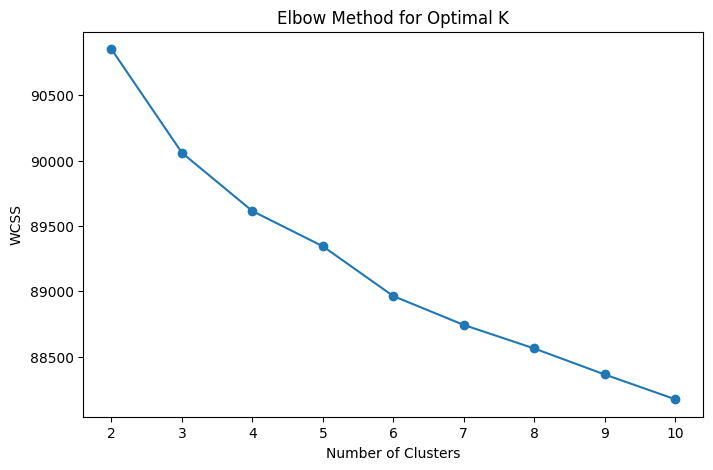

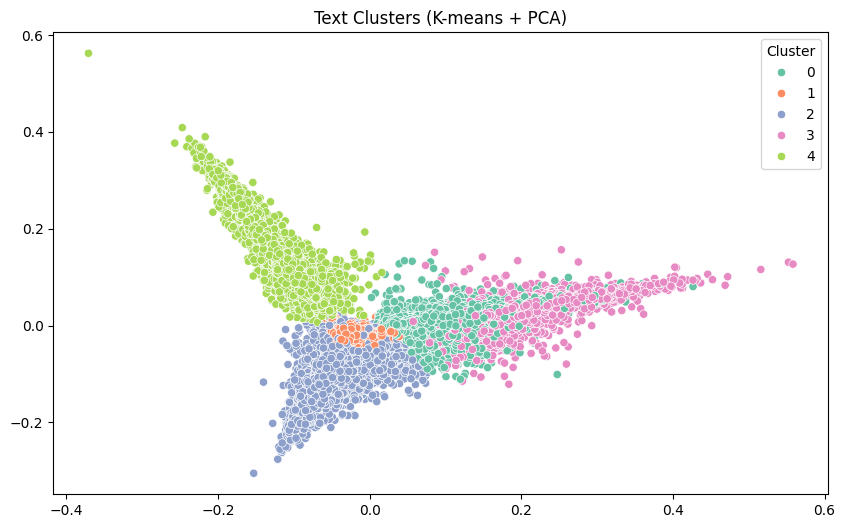

                                                 Text  Cluster
0   Obama Lays Wreath at Arlington National Cemete...        3
1   A Look at the Health of the Chinese Economy Ti...        2
2   Nouriel Roubini: Global Economy Not Back to 20...        2
3   Finland GDP Expands In Q4 Finland's economy ex...        2
4   Tourism, govt spending buoys Thai economy in J...        2
5   Intellitec Solutions to Host 13th Annual Sprin...        4
6   Monday, 29 Feb 2016 RAMALLAH, February 25, 201...        1
7   Obama, stars pay a musical tribute to Ray Char...        0
8   Fire claims more than 100-year-old barn in Han...        2
9   Microsoft's new Windows 10 ad targets Apple Ne...        4
10  Microsoft Project Centennial seen with “univer...        4
11  Microsoft sneaks onto Android while Android sn...        4
12  Greek economy grows 0.1 pct q/q in fourth quar...        2
13  Big data and the Internet of Things to add £32...        2
14  HoloLens dev edition costs £2,000 with new Con...  

In [22]:
# Load dataset
df = pd.read_csv('Theme2_News_Final.csv')

# Combine Title and Headline for text input
df['Text'] = df['Title'].fillna('') + ' ' + df['Headline'].fillna('')

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(df['Text'])

# Determine optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
K = range(2, 11)  # Testing cluster sizes from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Set number of clusters (adjust based on elbow plot)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_tfidf)

# Add cluster labels to the dataset
df['Cluster'] = clusters

# Visualizing clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Text Clusters (K-means + PCA)')
plt.show()

# Show a sample of clustered data
print(df[['Text', 'Cluster']].head(20))

# Optional: Save clustered data to CSV
df.to_csv('Clustered_Text_Data.csv', index=False)
print("Clustered data saved to 'Clustered_Text_Data.csv'.")

## THE END